# Disclaimer
Please notice that the dataset used in this problem is generated using Google Gemini for the purpose of practing some Python data science skills and the data science workflow.

This notebook contains a data set with 60000 data points, the actual interpretation of the model might have no real-world meaning.
# Task: Predicting Customer Churn

You are a data scientist at a telecommunications company. The company is concerned about customers leaving their service (churning). You have been tasked with building a model that can predict which customers are likely to churn based on their account information and usage patterns.

In this context, *churning* is the loss of a customer for any reason at all.

## Your goals are to:

1. **Load and Explore the Data**: Load the provided dataset using Pandas. Examine the data to understand its structure, features, and data types.
2. **Perform Basic Data Cleaning**: Check for any missing values or inconsistencies in the data and handle them appropriately.
3. **Perform Exploratory Data Analysis (EDA)**: Visualize the data to understand the relationships between different features and the churn status. Look for any patterns or trends that might be indicative of churn.
4. **Prepare the Data for Modeling**: This might involve encoding categorical features (converting text-based categories into numerical representations) and potentially scaling numerical features.
5. **Build a Simple Classification Model**: Train a basic classification model (e.g., Logistic Regression) using scikit-learn to predict whether a customer will churn or not.
6. **Evaluate the Model**: Assess the performance of your model using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
7. **Document Your Findings**: Explain your steps, the insights you gained from the data, and the performance of your model.

In [2]:
# import relevant python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib ipympl

In [3]:
#load the data set

dataset = pd.read_csv('dataset_larger.csv')

# 1) Load and Explore the data
The first step is to check the first few lines of the dataset .head() and also to have an idea of the number of elements, the rows and columns and the datatypes contained in each column. These are simply the dataset attributes .size, .shape, .dtypes. Finally, running descriptive column statistics is as easy as calling the dataset method .describe().

In [4]:
dataset.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print('The number of elements (size) of the dataset is: ', dataset.size)
print('The number of rows and columns (shape) of the dataset is: ', dataset.shape)
print('The datatypes per each column are: \n')
print(dataset.dtypes)
print("Below is the descriptive column statistics of the whole dataset: \n")
dataset.describe() #Remember that unless specified, tha statistics is run ONLY on continous (numeric) data

The number of elements (size) of the dataset is:  1344
The number of rows and columns (shape) of the dataset is:  (64, 21)
The datatypes per each column are: 

CustomerID            int64
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
Below is the descriptive column statistics of the whole dataset: 



,CustomerID,SeniorCitizen,tenure,MonthlyCharges
count,64.000000,64.000000,64.000000,64.000000
mean,32.500000,0.031250,21.109375,64.290625
std,18.618987,0.175368,26.237691,46.167024
min,1.000000,0.000000,1.000000,19.200000
25%,16.750000,0.000000,1.000000,30.237500
50%,32.500000,0.000000,3.500000,55.675000
75%,48.250000,0.000000,46.000000,91.137500
max,64.000000,1.000000,72.000000,326.800000


In [6]:
dataset.head(2)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


## Check for missing values
.isnull() method checks and reports the whole dataset. True = NaN, False = data point is numeric
.notnull() does the opposite.
.isnull().values.any will ONLY report the missing values if found.

It seems from the cell below that our dataset does not contain any not a number NaN value

In [7]:
dataset.isnull().values.any

dataset.columns.values #What columns to keep?
dataset.dropna(inplace=True) #Let's drop any not a number NaN value in the dataset anyway

## One-hot encoding
We have to predict churning. I would assume that the Churn column being present means this is a supervised model. Also the churn model records the entries as 'Yes' and 'No'. This could be one-hot encoded into 1s and 0s.

In [8]:
# Make a new dataset with column "Churn" one-hot encoded using pd.get_dummies() method
dataset_oneHot =  pd.get_dummies(data = dataset, columns=['Churn'], dtype=int) #note that dtype=int will force the hot_one encoding to produce 0s and 1s, not True or False

#Note that the pd.get_dummies() method will separate the values yes or no into two columns but this is redundandt
#so the next step will be to remove one of the two columns.

dataset_oneHot.head()


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
0,1,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,0
1,2,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,1,0
2,3,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,1
3,4,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1,0
4,5,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,1


In [9]:

#The inplace argument, if True, modifies the dataset_oneHot dataframe on the spot. It is not necessary to reassing it 

dataset_oneHot.drop(columns='Churn_No', inplace=True)


#Display the new dataset
dataset_oneHot.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes
0,1,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,2,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,4,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,5,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## EDA - Plots
Let's have a look at what variables might be strongly depending on each other. Let's see the dataset for ourselves.

For example we make figure showing bar chart of monthly charges against those leaving (churning = 1) and staying (churning = 0) separated per gender Male/Female

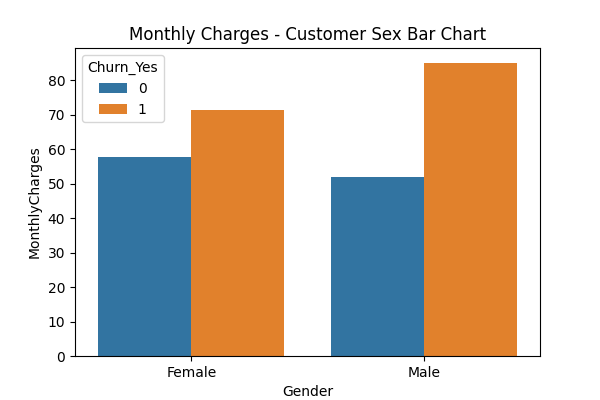

In [10]:
plt.figure(figsize=(6,4))
sb.barplot(data=dataset_oneHot, x='Gender', y='MonthlyCharges', hue='Churn_Yes', errorbar=None)
plt.title('Monthly Charges - Customer Sex Bar Chart')
plt.show()

Both males and females have higher churning with higher charges.
More males leave compared to females. Why?

Let's check whether this applies to seniority as well.
Seniority in column SeniorCitizen is one-hot encoded? Yes!


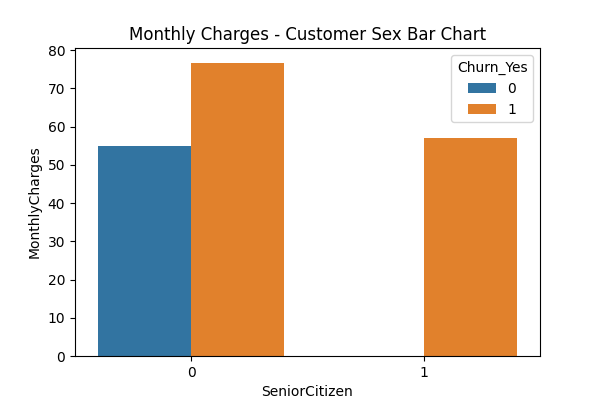

In [11]:
plt.figure(figsize=(6,4))
sb.barplot(data=dataset_oneHot, x='SeniorCitizen', y='MonthlyCharges', hue='Churn_Yes', errorbar=None)
plt.title('Monthly Charges - Customer Sex Bar Chart')
plt.show()

Non-senior citizens stay when charges all lower than ~60. Churning is higher when charges are higer.
Senior citizens get out of contracts when charges are relatively low. However, they all quit?


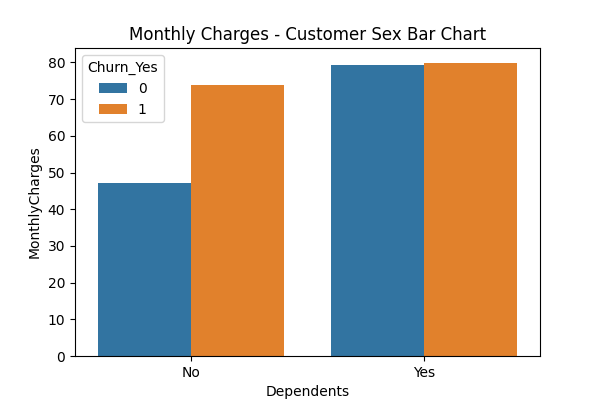

In [12]:
dataset_oneHot['Dependents'].unique() #I see the Dependent column only says yes or no. 
#We could check this too

plt.figure(figsize=(6,4))
sb.barplot(data=dataset_oneHot, x='Dependents', y='MonthlyCharges', hue='Churn_Yes', errorbar=None)
plt.title('Monthly Charges - Customer Sex Bar Chart')
plt.show()

There's an equal distribution of people staying or leveling with higher monthly charges if there are dependents in the family.
For those with no dependents, higher charges lead to leaving a service compared to those on lower monthly charges

In [13]:
dataset_oneHot.columns.values

array(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn_Yes'], dtype=object)

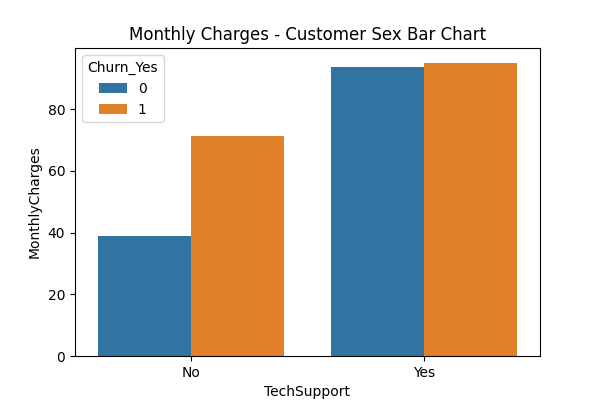

In [14]:
plt.figure(figsize=(6,4))
sb.barplot(data=dataset_oneHot, x='TechSupport', y='MonthlyCharges', hue='Churn_Yes', errorbar=None)
plt.title('Monthly Charges - Customer Sex Bar Chart')
plt.show()

People with tech support tend to leave only when the charges are very high.

## Model Training
Churning is a yes or no problem, therefore a classification model seems to be ideal for this purpose.
Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression #Import the logistic regression classifier class
classifier = LogisticRegression() #make our own classifier to fit the model, predict and evaluate.

from sklearn.model_selection import train_test_split #import functions for dataset splitting into training and testing

#Let's fit a logistic regression model based on customer gender
#The churinng information was already one-hot encoded
#The gender column needs to be one-hot encoder

dataset_model = pd.get_dummies(data=dataset_oneHot, columns=['Gender'], dtype=int)

#The feautes have to be in matrix-format even if one column only is selected.
#So, please remember to use a list to select a column or more columns!!!
# The target column needs not be in matrix-like format, so just the values from the colum are needed
# I know, all these square brackets are confusing. xD 
feature = dataset_model[['Gender_Male']]
target = dataset_model['Churn_Yes']

#Split the feature and target variables extracted from dataset in order for traininng and testing
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.5, random_state=42)

classifier.fit(X_train, y_train) #The model is here trained

#The fit is executed fine.

LogisticRegression()

In [16]:
#Let's  predict the y values in y_pred variable
y_pred = classifier.predict(X_test)
#The prediction is executed fine.

# Model Evaluation
The model is fitted. Predictions have been made (y_pred).
It is now important to compare the predicted y_pred values with the y_test values in the dataset, generate some score.

In [17]:
#In scikit-learn, every estimator (including logistic regression) has a score() method
#which reports the accuracy of the model
classifier.score(X_test, y_test)

#More important metrics should also be evaluated:
#accuracy, precision, recall, F-1 score
from sklearn.metrics import *

print("The accuracy of the model is: ", accuracy_score(y_test, y_pred))
#Note that the accuracy_score function is the same as the built_in .score() method of the classifiers
#in sklearn.

print("The recall of the model is: ", recall_score(y_test, y_pred))
print("The precision of the model is: ", precision_score(y_test, y_pred))
print("The F1-score of the model is: ", f1_score(y_test, y_pred) )

print("###################################\n")
print('For the sake of exercise, notice that the values above can all be printed at once using' \
'the classificatio_report function from sklearn.metrics.')

print(classification_report(y_test, y_pred))

The accuracy of the model is:  0.6451612903225806
The recall of the model is:  0.0
The precision of the model is:  0.0
The F1-score of the model is:  0.0
###################################

For the sake of exercise, notice that the values above can all be printed at once usingthe classificatio_report function from sklearn.metrics.
              precision    recall  f1-score   support

           0       0.65      1.00      0.78        20
           1       0.00      0.00      0.00        11

    accuracy                           0.65        31
   macro avg       0.32      0.50      0.39        31
weighted avg       0.42      0.65      0.51        31



c:\Users\mario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

## Model Evaluation - continued
Even if the model metrics make no sense at the moment, these are the next tasks
1. Review the meaning of **accuracy** of a model
2. Review the meaning of **precision** of a model
3. Review the meaning of **recall** of a model
4. Review the meaning of the **F1-score**
5. Review the concept of **confusion matrix**
6. Plot the confusion matrix (after generating it with scikit-learn)
7. How are metrics above and the values in the confusion matrix related to one another?
8. Review the meaning of **model deployment**

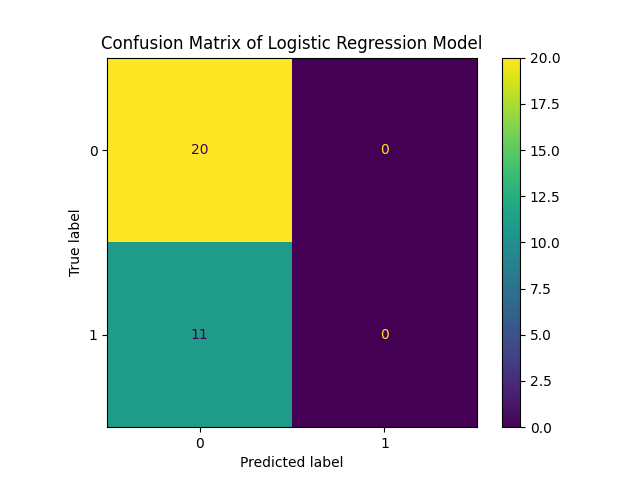

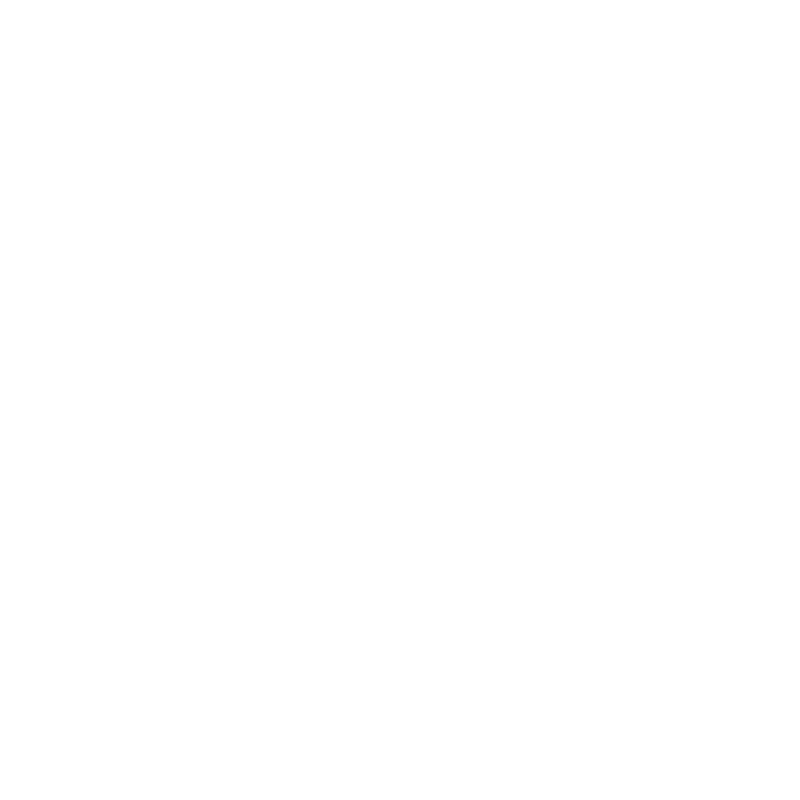

In [ ]:
#sklearn offers a way to show the confusion matrix in sklearn.metrics class already
myConfusionMatrix = confusion_matrix(y_test, y_pred)
#sklearn offers also a way to plot the confusion matrix above. The plot can be tweaked with matplolib
plt.figure(figsize=(8,8))
myConfusionMatrix_display = ConfusionMatrixDisplay(myConfusionMatrix) #Generate the plot from myConfusionMatrix
myConfusionMatrix_display.plot() #plots the information contained in the myConfusionMatrix_display class
plt.title("Confusion Matrix of Logistic Regression Model")
plt.show()